# ML HW1 | Supervised Learning | SVM
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Note: I partially took this course in Fall of 2020 and dropped the course. Some content may trigget plagiarism tests.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import time

## Set directory

In [2]:
directory = "/Users/mikepecorino/Documents/machine_learning/HW1/"

## Load inputs

In [3]:
data_all = pd.read_csv(directory + "sensor_all.csv")

## Define features and response variable

### Features list

In [4]:
features = data_all.columns[data_all.columns.isin(["subject", "activity_raw", "activity", "tag", "fold", "response_prop"]) == False]


### Features data

In [5]:
data_all_features = data_all[features]
train_features = data_all[features][data_all["tag"] == "train"]
valid_features = data_all[features][data_all["tag"] == "valid"]
test_features = data_all[features][data_all["tag"] == "test"]

### Response variable

In [6]:
response = "activity"

### Response data

In [7]:
data_all_response = data_all[response]
train_response = data_all[response][data_all["tag"] == "train"]
valid_response = data_all[response][data_all["tag"] == "valid"]
test_response = data_all[response][data_all["tag"] == "test"]

## SVM

### Grid search

In [8]:
data_cv = data_all[data_all["tag"].isin(["train", "valid"])]
folds = set(data_cv["fold"])
folds

{1, 2, 3, 4, 5}

In [9]:
#Initialize an empty data frame for recording results
svm_results = pd.DataFrame(columns = ["iter_counter",
                                      "fold",
                                      "c",
                                      "kernel",
                                      "in_fold_accuracy",
                                      "out_fold_accuracy"])

#Set the hyperparameter space
cs = [.01, .02, .05, .1, .15, .2, .25, .3]
kernels = ["rbf", "sigmoid"]

#Start an iteration counter
iter_counter = 0

#For each C, kernel, and fold...
for C in cs:
    for kernel in kernels:
        for fold in folds:
            
            #Debugging
            #C = .01
            #kernel = "rbf"
            #fold = 1
        
            #Increment the counter
            iter_counter = iter_counter + 1
    
            #Output message
            print("Iter:", iter_counter,
                  "| fold:", fold,
                  "| complexity:", C,
                  "| kernel:", kernel)

            #Train on 4 out of 5 folds
            train_fold_features = data_cv[data_cv["fold"] != fold][features]
            train_fold_response = data_cv[data_cv["fold"] != fold][response]
        
            #Test on the current fold
            test_fold_features = data_cv[data_cv["fold"] == fold][features]
            test_fold_response = data_cv[data_cv["fold"] == fold][response]
            
            #Get the model object
            svm_model = SVC(C = C,
                            kernel = kernel,
                            degree = 3,
                            gamma = "auto",
                            coef0 = 0.0,
                            shrinking = True,
                            probability = False,
                            tol = 0.001,
                            cache_size = 200,
                            class_weight = None,
                            verbose = False,
                            max_iter = -1,
                            decision_function_shape = "ovr",
                            random_state = 28
                            )

            #Fir the model
            svm_model.fit(train_fold_features, train_fold_response) 

            #Evaluate the model
            #In fold
            in_fold_accuracy = svm_model.score(train_fold_features, train_fold_response)
            #Out of fold
            out_fold_accuracy = svm_model.score(test_fold_features, test_fold_response)

            #Add to results list
            svm_results = svm_results.append({"iter_counter": iter_counter,
                                              "fold": fold,
                                              "c": C,
                                              "kernel": kernel,
                                              "in_fold_accuracy": in_fold_accuracy,
                                              "out_fold_accuracy": out_fold_accuracy},
                                            ignore_index = True)
            print(svm_results, "\n")

Iter: 1 | fold: 1 | complexity: 0.01 | kernel: rbf
  iter_counter fold     c kernel  in_fold_accuracy  out_fold_accuracy
0            1    1  0.01    rbf          0.356924           0.360887 

Iter: 2 | fold: 2 | complexity: 0.01 | kernel: rbf
  iter_counter fold     c kernel  in_fold_accuracy  out_fold_accuracy
0            1    1  0.01    rbf          0.356924           0.360887
1            2    2  0.01    rbf          0.359362           0.349760 

Iter: 3 | fold: 3 | complexity: 0.01 | kernel: rbf
  iter_counter fold     c kernel  in_fold_accuracy  out_fold_accuracy
0            1    1  0.01    rbf          0.356924           0.360887
1            2    2  0.01    rbf          0.359362           0.349760
2            3    3  0.01    rbf          0.355840           0.363820 

Iter: 4 | fold: 4 | complexity: 0.01 | kernel: rbf
  iter_counter fold     c kernel  in_fold_accuracy  out_fold_accuracy
0            1    1  0.01    rbf          0.356924           0.360887
1            2    2 

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
5             6    1  0.01  sigmoid          0.356071           0.359543
6             7    2  0.01  sigmoid          0.358173           0.351129
7             8    3  0.01  sigmoid          0.355328           0.362475
8             9    4  0.01  sigmoid          0.352273           0.374313
9            10    5  0.01  sigmoid          0.362356           0.335616
10           11    1  0.02      rbf          0.552353           0.549059
11           12    2  0.02      rbf          0.552877           0.548255
12           13    3  0.02      rbf          0.5558

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
5             6    1  0.01  sigmoid          0.356071           0.359543
6             7    2  0.01  sigmoid          0.358173           0.351129
7             8    3  0.01  sigmoid          0.355328           0.362475
8             9    4  0.01  sigmoid          0.352273           0.374313
9            10    5  0.01  sigmoid          0.362356           0.335616
10           11    1  0.02      rbf          0.552353           0.549059
11           12    2  0.02      rbf          0.552877           0.548255
12           13    3  0.02      rbf          0.5558

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
5             6    1  0.01  sigmoid          0.356071           0.359543
6             7    2  0.01  sigmoid          0.358173           0.351129
7             8    3  0.01  sigmoid          0.355328           0.362475
8             9    4  0.01  sigmoid          0.352273           0.374313
9            10    5  0.01  sigmoid          0.362356           0.335616
10           11    1  0.02      rbf          0.552353           0.549059
11           12    2  0.02      rbf          0.552877           0.548255
12           13    3  0.02      rbf          0.5558

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
5             6    1  0.01  sigmoid          0.356071           0.359543
6             7    2  0.01  sigmoid          0.358173           0.351129
7             8    3  0.01  sigmoid          0.355328           0.362475
8             9    4  0.01  sigmoid          0.352273           0.374313
9            10    5  0.01  sigmoid          0.362356           0.335616
10           11    1  0.02      rbf          0.552353           0.549059
11           12    2  0.02      rbf          0.552877           0.548255
12           13    3  0.02      rbf          0.5558

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
5             6    1  0.01  sigmoid          0.356071           0.359543
6             7    2  0.01  sigmoid          0.358173           0.351129
7             8    3  0.01  sigmoid          0.355328           0.362475
8             9    4  0.01  sigmoid          0.352273           0.374313
9            10    5  0.01  sigmoid          0.362356           0.335616
10           11    1  0.02      rbf          0.552353           0.549059
11           12    2  0.02      rbf          0.552877           0.548255
12           13    3  0.02      rbf          0.5558

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
5             6    1  0.01  sigmoid          0.356071           0.359543
6             7    2  0.01  sigmoid          0.358173           0.351129
7             8    3  0.01  sigmoid          0.355328           0.362475
8             9    4  0.01  sigmoid          0.352273           0.374313
9            10    5  0.01  sigmoid          0.362356           0.335616
10           11    1  0.02      rbf          0.552353           0.549059
11           12    2  0.02      rbf          0.552877           0.548255
12           13    3  0.02      rbf          0.5558

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
5             6    1  0.01  sigmoid          0.356071           0.359543
6             7    2  0.01  sigmoid          0.358173           0.351129
7             8    3  0.01  sigmoid          0.355328           0.362475
8             9    4  0.01  sigmoid          0.352273           0.374313
9            10    5  0.01  sigmoid          0.362356           0.335616
10           11    1  0.02      rbf          0.552353           0.549059
11           12    2  0.02      rbf          0.552877           0.548255
12           13    3  0.02      rbf          0.5558

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
5             6    1  0.01  sigmoid          0.356071           0.359543
6             7    2  0.01  sigmoid          0.358173           0.351129
7             8    3  0.01  sigmoid          0.355328           0.362475
8             9    4  0.01  sigmoid          0.352273           0.374313
9            10    5  0.01  sigmoid          0.362356           0.335616
10           11    1  0.02      rbf          0.552353           0.549059
11           12    2  0.02      rbf          0.552877           0.548255
12           13    3  0.02      rbf          0.5558

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
5             6    1  0.01  sigmoid          0.356071           0.359543
6             7    2  0.01  sigmoid          0.358173           0.351129
7             8    3  0.01  sigmoid          0.355328           0.362475
8             9    4  0.01  sigmoid          0.352273           0.374313
9            10    5  0.01  sigmoid          0.362356           0.335616
10           11    1  0.02      rbf          0.552353           0.549059
11           12    2  0.02      rbf          0.552877           0.548255
12           13    3  0.02      rbf          0.5558

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
5             6    1  0.01  sigmoid          0.356071           0.359543
6             7    2  0.01  sigmoid          0.358173           0.351129
7             8    3  0.01  sigmoid          0.355328           0.362475
8             9    4  0.01  sigmoid          0.352273           0.374313
9            10    5  0.01  sigmoid          0.362356           0.335616
10           11    1  0.02      rbf          0.552353           0.549059
11           12    2  0.02      rbf          0.552877           0.548255
12           13    3  0.02      rbf          0.5558

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
5             6    1  0.01  sigmoid          0.356071           0.359543
6             7    2  0.01  sigmoid          0.358173           0.351129
7             8    3  0.01  sigmoid          0.355328           0.362475
8             9    4  0.01  sigmoid          0.352273           0.374313
9            10    5  0.01  sigmoid          0.362356           0.335616
10           11    1  0.02      rbf          0.552353           0.549059
11           12    2  0.02      rbf          0.552877           0.548255
12           13    3  0.02      rbf          0.5558

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
5             6    1  0.01  sigmoid          0.356071           0.359543
6             7    2  0.01  sigmoid          0.358173           0.351129
7             8    3  0.01  sigmoid          0.355328           0.362475
8             9    4  0.01  sigmoid          0.352273           0.374313
9            10    5  0.01  sigmoid          0.362356           0.335616
10           11    1  0.02      rbf          0.552353           0.549059
11           12    2  0.02      rbf          0.552877           0.548255
12           13    3  0.02      rbf          0.5558

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
5             6    1  0.01  sigmoid          0.356071           0.359543
6             7    2  0.01  sigmoid          0.358173           0.351129
7             8    3  0.01  sigmoid          0.355328           0.362475
8             9    4  0.01  sigmoid          0.352273           0.374313
9            10    5  0.01  sigmoid          0.362356           0.335616
10           11    1  0.02      rbf          0.552353           0.549059
11           12    2  0.02      rbf          0.552877           0.548255
12           13    3  0.02      rbf          0.5558

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
5             6    1  0.01  sigmoid          0.356071           0.359543
6             7    2  0.01  sigmoid          0.358173           0.351129
7             8    3  0.01  sigmoid          0.355328           0.362475
8             9    4  0.01  sigmoid          0.352273           0.374313
9            10    5  0.01  sigmoid          0.362356           0.335616
10           11    1  0.02      rbf          0.552353           0.549059
11           12    2  0.02      rbf          0.552877           0.548255
12           13    3  0.02      rbf          0.5558

   iter_counter fold     c kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01    rbf          0.356924           0.360887
1             2    2  0.01    rbf          0.359362           0.349760
2             3    3  0.01    rbf          0.355840           0.363820
3             4    4  0.01    rbf          0.353121           0.378434
4             5    5  0.01    rbf          0.363035           0.334932
..          ...  ...   ...    ...               ...                ...
60           61    1  0.25    rbf          0.910812           0.913978
61           62    2  0.25    rbf          0.911560           0.903491
62           63    3  0.25    rbf          0.912191           0.905851
63           64    4  0.25    rbf          0.910448           0.903846
64           65    5  0.25    rbf          0.909708           0.909589

[65 rows x 6 columns] 

Iter: 66 | fold: 1 | complexity: 0.25 | kernel: sigmoid
   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_acc

   iter_counter fold     c   kernel  in_fold_accuracy  out_fold_accuracy
0             1    1  0.01      rbf          0.356924           0.360887
1             2    2  0.01      rbf          0.359362           0.349760
2             3    3  0.01      rbf          0.355840           0.363820
3             4    4  0.01      rbf          0.353121           0.378434
4             5    5  0.01      rbf          0.363035           0.334932
..          ...  ...   ...      ...               ...                ...
69           70    5  0.25  sigmoid          0.885098           0.885616
70           71    1  0.30      rbf          0.916780           0.916667
71           72    2  0.30      rbf          0.916313           0.911020
72           73    3  0.30      rbf          0.917136           0.913921
73           74    4  0.30      rbf          0.915366           0.908654

[74 rows x 6 columns] 

Iter: 75 | fold: 5 | complexity: 0.3 | kernel: rbf
   iter_counter fold     c kernel  in_fold_accur

### Output

In [21]:
svm_results = svm_results.sort_values(by = ['out_fold_accuracy'], ascending = False)
svm_results.to_csv(directory + "sensor_svm_grid_search.csv", index = False)
svm_results

,iter_counter,fold,c,kernel,in_fold_accuracy,out_fold_accuracy
70,71,1,0.30,rbf,0.916780,0.916667
60,61,1,0.25,rbf,0.910812,0.913978
72,73,3,0.30,rbf,0.917136,0.913921
71,72,2,0.30,rbf,0.916313,0.911020
74,75,5,0.30,rbf,0.914460,0.910959
...,...,...,...,...,...,...
16,17,2,0.02,sigmoid,0.359192,0.351129
1,2,2,0.01,rbf,0.359362,0.349760
9,10,5,0.01,sigmoid,0.362356,0.335616
4,5,5,0.01,rbf,0.363035,0.334932


### Get mean accuracy across the folds

In [11]:
in_fold_cv_summary = svm_results.groupby(["c", "kernel"])["in_fold_accuracy"].agg(["mean"]).sort_values(by = ['mean'], ascending = False)
out_fold_cv_summary = svm_results.groupby(["c", "kernel"])["out_fold_accuracy"].agg(["mean"]).sort_values(by = ['mean'], ascending = False)

print(out_fold_cv_summary)

                  mean
c    kernel           
0.30 rbf      0.912244
0.25 rbf      0.907351
0.20 rbf      0.901782
0.15 rbf      0.892003
0.30 sigmoid  0.888738
0.25 sigmoid  0.881944
0.10 rbf      0.880032
0.20 sigmoid  0.846421
0.15 sigmoid  0.790342
0.05 rbf      0.767728
0.10 sigmoid  0.760368
0.05 sigmoid  0.585272
0.02 rbf      0.553736
     sigmoid  0.357569
0.01 rbf      0.357567
     sigmoid  0.356615


### Get the optimal hyperparameters

In [12]:
optimal_results = out_fold_cv_summary.index[np.argmax(out_fold_cv_summary["mean"])]
c_opt = optimal_results[0]
kernel_opt = optimal_results[1]

### Train a final model with the optimal hyperparameters

In [13]:
svm_model = SVC(C = c_opt,
                kernel = kernel_opt,
                degree = 3,
                gamma = "auto",
                coef0 = 0.0,
                shrinking = True,
                probability = False,
                tol = 0.001,
                cache_size = 200,
                class_weight = None,
                verbose = False,
                max_iter = -1,
                decision_function_shape = "ovr",
                random_state = 28)

svm_model.fit(train_features, train_response) 

print("SVM accuracy on training data: ",
      svm_model.score(train_features, train_response))
print("SVM accuracy on validation data: ",
      svm_model.score(valid_features, valid_response))
print("SVM accuracy on test data: ",
      svm_model.score(test_features, test_response))

SVM accuracy on training data:  0.913541869049932
SVM accuracy on validation data:  0.9124716553287981
SVM accuracy on test data:  0.8992195453003053


### Learning curve

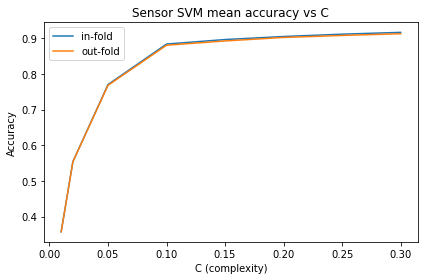

In [14]:
in_fold_c_summary = svm_results[(svm_results["kernel"] == kernel_opt)].groupby(["c"])["in_fold_accuracy"].agg(["mean"]).sort_values(by = ["c"], ascending = True)
out_fold_c_summary = svm_results[(svm_results["kernel"] == kernel_opt)].groupby(["c"])["out_fold_accuracy"].agg(["mean"]).sort_values(by = ["c"], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("C (complexity)")
ax.set_ylabel("Accuracy")
ax.set_title("Sensor SVM mean accuracy vs C")
ax.plot(cs,
        in_fold_c_summary["mean"],
        label = "in-fold")
ax.plot(cs,
        out_fold_c_summary["mean"],
        label = "out-fold")
ax.legend()

fig.tight_layout()

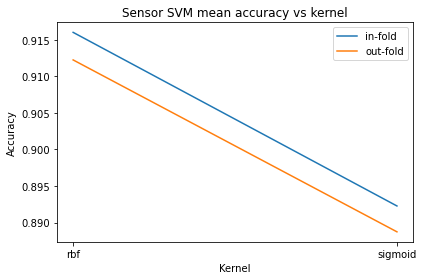

In [16]:
in_fold_k_summary = svm_results[(svm_results['c'] == c_opt)].groupby(['kernel'])['in_fold_accuracy'].agg(['mean']).sort_values(by = ['kernel'], ascending = True)
out_fold_k_summary = svm_results[(svm_results['c'] == c_opt)].groupby(['kernel'])['out_fold_accuracy'].agg(['mean']).sort_values(by = ['kernel'], ascending = True)

fig, ax = plt.subplots()

ax.set_xlabel("Kernel")
ax.set_ylabel("Accuracy")
ax.set_title("Sensor SVM mean accuracy vs kernel")
ax.plot(kernels,
        in_fold_k_summary['mean'],
        label = "in-fold")
ax.plot(kernels,
        out_fold_k_summary['mean'],
        label = "out-fold")
ax.legend()

fig.tight_layout()

### Function of training size

In [17]:
svm_train_sizes = []
svm_train_size_train_scores = []
svm_train_size_test_scores = []
svm_train_size_train_time = []
svm_train_size_score_time = []

iter_counter = 0
train_sizes = np.linspace(.05,.95, 19)
for train_size in train_sizes:
    (train_features_train_size, test_features_train_size,
    train_response_train_size, test_response_train_size) = train_test_split(data_all_features,
                                                                            data_all_response,
                                                                            train_size = train_size,
                                                                            random_state = 28)
    
    iter_counter = iter_counter + 1
    print("iter_counter:", iter_counter,
          "| train size:", train_size)
    svm_train_size = SVC(C = c_opt,
                         kernel = kernel_opt,
                         degree = 3,
                         gamma = "auto",
                         coef0 = 0.0,
                         shrinking = True,
                         probability = False,
                         tol = 0.001,
                         cache_size = 200,
                         class_weight = None,
                         verbose = False,
                         max_iter = -1,
                         decision_function_shape = "ovr",
                         random_state = 28
                         )
    start = time.time()
    svm_train_size.fit(train_features_train_size, train_response_train_size)
    end = time.time()
    svm_train_size_train_time.append(end - start)

    svm_train_sizes.append(svm_train_size)
    
    start = time.time()
    svm_train_size_train_scores.append(svm_train_size.score(train_features_train_size, train_response_train_size)) 
    end = time.time()
    svm_train_size_score_time.append(end - start)

    svm_train_size_test_scores.append(svm_train_size.score(test_features_train_size, test_response_train_size))

iter_counter: 1 | train size: 0.05
iter_counter: 2 | train size: 0.1
iter_counter: 3 | train size: 0.15
iter_counter: 4 | train size: 0.2
iter_counter: 5 | train size: 0.25
iter_counter: 6 | train size: 0.3
iter_counter: 7 | train size: 0.35
iter_counter: 8 | train size: 0.39999999999999997
iter_counter: 9 | train size: 0.44999999999999996
iter_counter: 10 | train size: 0.49999999999999994
iter_counter: 11 | train size: 0.5499999999999999
iter_counter: 12 | train size: 0.6
iter_counter: 13 | train size: 0.65
iter_counter: 14 | train size: 0.7
iter_counter: 15 | train size: 0.75
iter_counter: 16 | train size: 0.7999999999999999
iter_counter: 17 | train size: 0.85
iter_counter: 18 | train size: 0.9
iter_counter: 19 | train size: 0.95


### Plotting the learning curve by training size, for the optimal hyperparameters

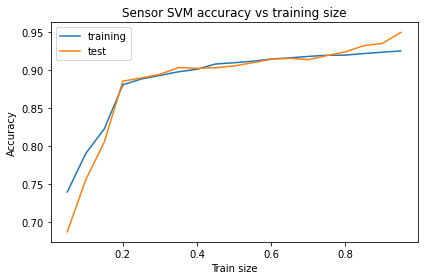

In [18]:
fig, ax = plt.subplots()

ax.set_xlabel("Train size")
ax.set_ylabel("Accuracy")
ax.set_title("Sensor SVM accuracy vs training size")
ax.plot(train_sizes, svm_train_size_train_scores, label = "training",
        #drawstyle = "steps-post"
       )
ax.plot(train_sizes, svm_train_size_test_scores, label = "test",
        #drawstyle = "steps-post"
       )
ax.legend()

fig.tight_layout()

###  Plotting the model fitting time as a function of the training size

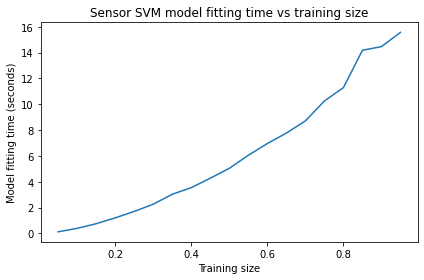

In [19]:
fig, ax = plt.subplots()

ax.set_xlabel("Training size")
ax.set_ylabel("Model fitting time (seconds)")
ax.set_title("Sensor SVM model fitting time vs training size")
ax.plot(train_sizes, svm_train_size_train_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()

### Plotting the model scoring time as a function of the training size

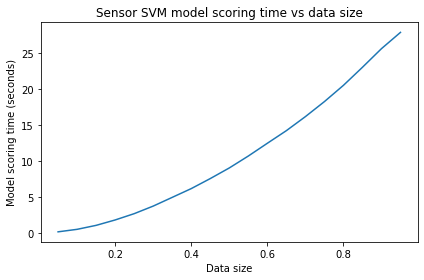

In [20]:
fig, ax = plt.subplots()

ax.set_xlabel("Data size")
ax.set_ylabel("Model scoring time (seconds)")
ax.set_title("Sensor SVM model scoring time vs data size")
ax.plot(train_sizes, svm_train_size_score_time, label = "training",
        #drawstyle = "steps-post"
       )

fig.tight_layout()